## Importeer benodigde libraies

In [10]:
import cv2
import matplotlib.pyplot as plt
import os
import glob

#### Lees de afbeelding in en toon de originele geveltekening

In [11]:
## half_vrijstaand_type_e
pad_naar_afbeelding = os.path.join("..", "Data_nest_uitgesneden", "half_vrijstaand_type_e (4).png")
img = cv2.imread(pad_naar_afbeelding)

Lees de afbeelding in zonder wijzigingen (inclusief alpha-kanaal als dat bestaat)


In [12]:
# Lees de afbeelding in zonder wijzigingen (inclusief alpha-kanaal als dat bestaat)
print(f"Afbeelding geladen. Formaat: {img.shape}")

Afbeelding geladen. Formaat: (746, 1201, 3)


### **Analyse van de afbeelding**

#### **Afmetingen (hoogte × breedte)**
- **Hoogte**: 610 pixels (aantal rijen)  
- **Breedte**: 845 pixels (aantal kolommen)  

#### **Kleurenkanalen**
- **Aantal kanalen**: 3 (BGR - Blauw, Groen, Rood)  
- **Transparantie**: Geen alpha-kanaal aanwezig (`shape=(610, 845, 3)`)  
  - Als er een 4e kanaal was (`shape=(610, 845, 4)`), zou dit een PNG met transparantie zijn.  

#### **Conclusie**
Dit is een standaard kleurenafbeelding **zonder transparantie**. Het alpha-kanaal ontbreekt, wat betekent dat alle pixels volledig dekkend zijn.

Toon de orginele afbeelding

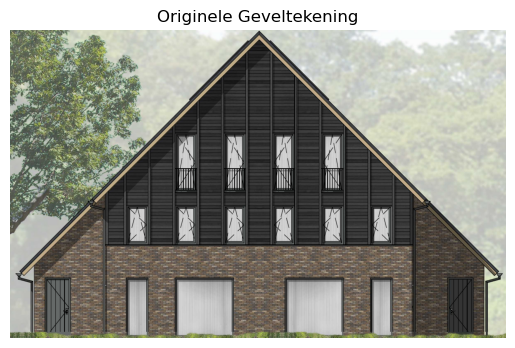

In [13]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Zet BGR naar RGB om correct weer te geven met matplotlib
# Toon de originele afbeelding 
plt.imshow(img_rgb)
plt.title("Originele Geveltekening")
plt.axis('off')
plt.show()

#### Zet de afbeelding om naar grijswaarden.

Om de afbeelding geschikt te maken voor randdetectie, zetten we het om naar grijswaarden

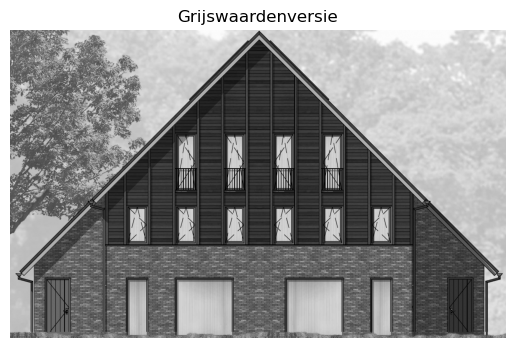

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grijswaardenversie")
plt.axis('off')
plt.show()

#### Toepassing van Gaussian Blur

We vervagen de afbeelding licht, om kleine ruis te verwijderen en scherper randdetectie te kijgen.

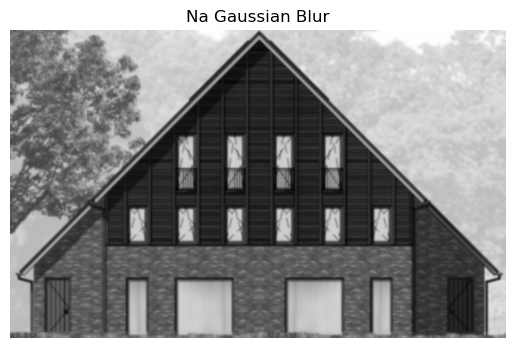

In [15]:
blur = cv2.GaussianBlur(gray, (13, 13), 2)

plt.imshow(blur, cmap='gray')
plt.title("Na Gaussian Blur")
plt.axis('off')
plt.show()

#### Deteteer randen met Canny

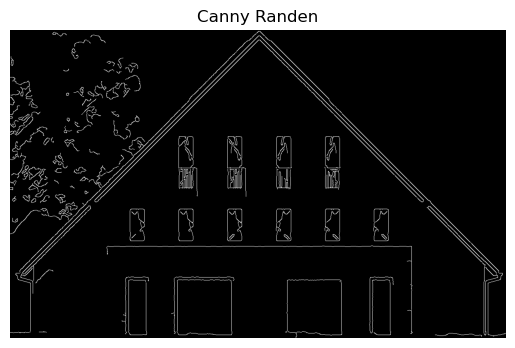

In [16]:
edges = cv2.Canny(blur, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Canny Randen")
plt.axis('off')
plt.show()

#### Vinden en visualiseer contouren

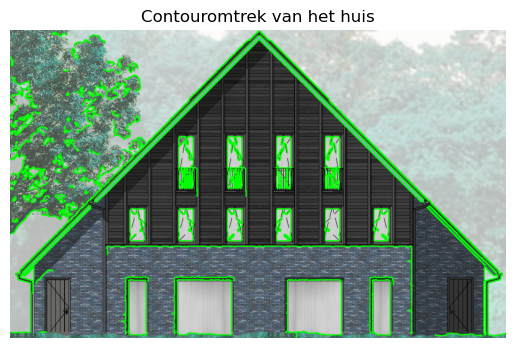

In [17]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = img.copy()# Maak een kopie van de originele afbeelding om op te tekenen
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Groene contouren

plt.imshow(image_with_contours)
plt.title("Contouromtrek van het huis")
plt.axis('off')
plt.show()

#### Alle geveltekeningen detcteren in ëën cel

In [18]:
input_dir = r"Data_nest_uitgesneden\Data_nest_uitgesneden"
output_dir = os.path.join(input_dir, "Resultaten_met_Contouren")
os.makedirs(output_dir, exist_ok=True)

# Zoek alle PNG-bestanden, ongeacht hoofdletters, inclusief submappen
image_paths = glob.glob(os.path.join(input_dir, "**", "*.[pP][nN][gG]"), recursive=True)

print(f"Gevonden bestanden: {len(image_paths)}")

def process_and_save_final(image_path):
    filename = os.path.splitext(os.path.basename(image_path))[0]
    img = cv2.imread(image_path)
    if img is None:
        print(f"Fout bij laden: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (13, 13), 2)
    edges = cv2.Canny(blur, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    image_with_contours = img.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

    output_path = os.path.join(output_dir, f"{filename}_contours.png")
    cv2.imwrite(output_path, image_with_contours)
    print(f"Opgeslagen: {output_path}")

# Verwerk alle gevonden afbeeldingen
for path in image_paths:
    process_and_save_final(path)

Gevonden bestanden: 0
